In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
pcos= pd.read_csv("PCOS_data.csv")

# Data Cleaning

In [3]:
pcos.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,24.9,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,25.3,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,29.7,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,20.1,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [4]:
pcos.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of abortions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

In [5]:
pcos.drop(["Sl. No","Patient File No."],axis="columns", inplace= True)

In [6]:
pcos

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.000,19.3,15,78,22,10.48,2,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.500,24.9,15,74,20,11.70,2,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.000,25.3,11,72,18,11.80,2,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.000,29.7,13,72,20,12.00,2,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.000,20.1,11,72,18,10.00,2,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,0,35,50.0,164.592,18.5,17,72,16,11.00,2,...,0,0.0,0,110,70,1,0,17.5,10.0,6.7
537,0,30,63.2,158.000,25.3,15,72,18,10.80,2,...,0,0.0,0,110,70,9,7,19.0,18.0,8.2
538,0,36,54.0,152.000,23.4,13,74,20,10.80,2,...,0,0.0,0,110,80,1,0,18.0,9.0,7.3
539,0,27,50.0,150.000,22.2,15,74,20,12.00,4,...,1,0.0,0,110,70,7,6,18.0,16.0,11.5


In [7]:
#Dealing with categorical values.
#In this database the type objects are numeric values saved as strings.
#So I am just converting it into a numeric value.

pcos["AMH(ng/mL)"] = pd.to_numeric(pcos["AMH(ng/mL)"], errors='coerce')
pcos["II    beta-HCG(mIU/mL)"] = pd.to_numeric(pcos["II    beta-HCG(mIU/mL)"], errors='coerce')

#Dealing with missing values. 
#Filling NA values with the median of that feature.

pcos['Marraige Status (Yrs)'].fillna(pcos['Marraige Status (Yrs)'].median(),inplace=True)
pcos['II    beta-HCG(mIU/mL)'].fillna(pcos['II    beta-HCG(mIU/mL)'].median(),inplace=True)
pcos['AMH(ng/mL)'].fillna(pcos['AMH(ng/mL)'].median(),inplace=True)
pcos['Fast food (Y/N)'].fillna(pcos['Fast food (Y/N)'].median(),inplace=True)

# Modeling Data

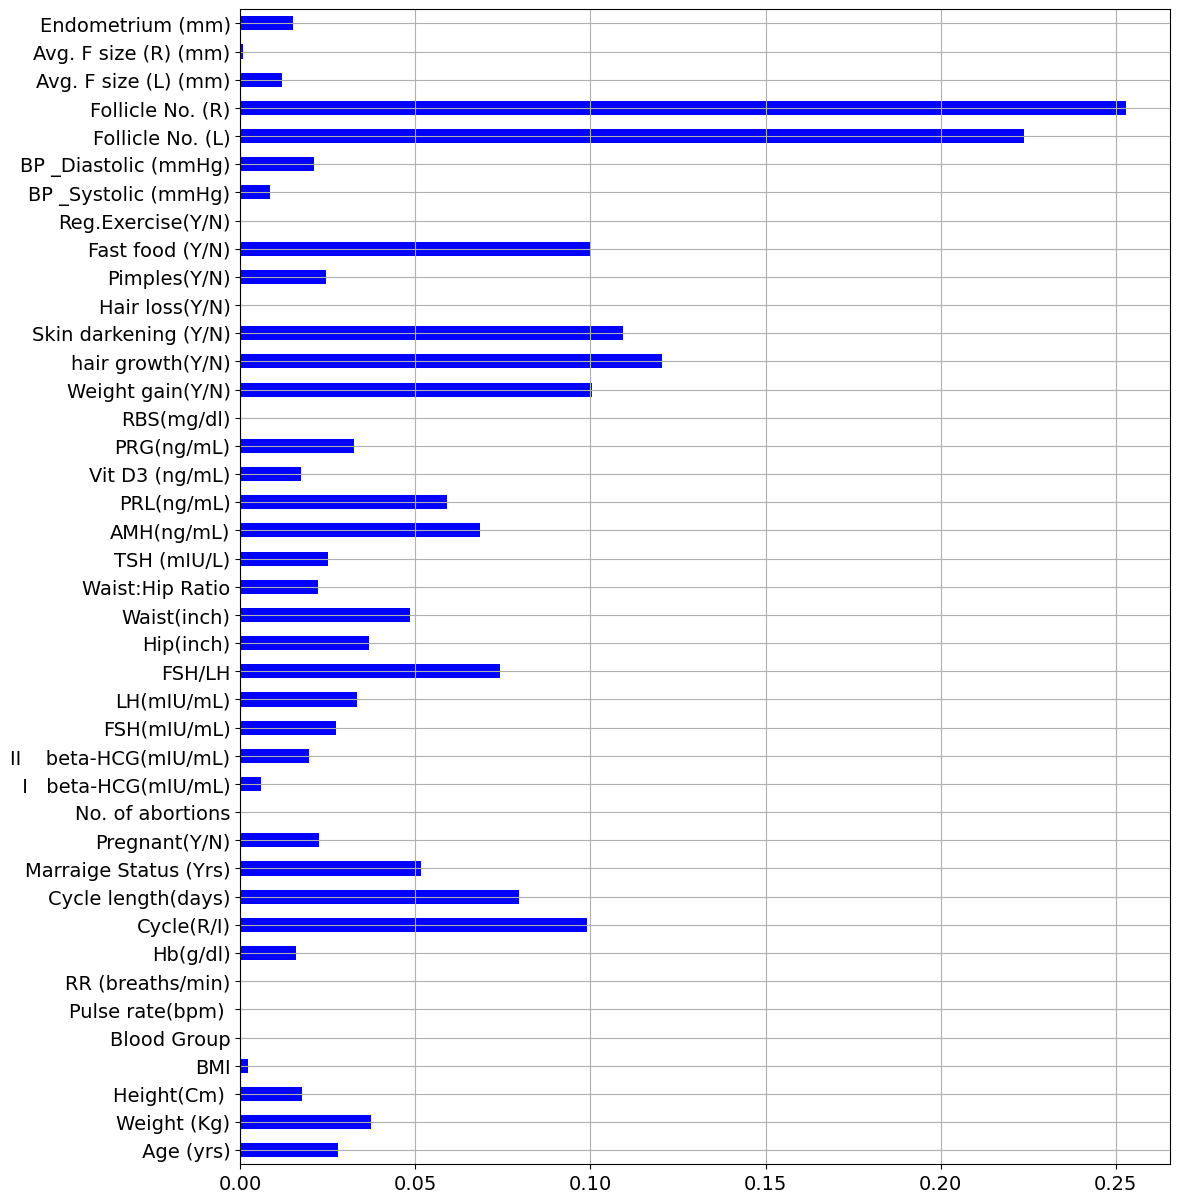

In [8]:
from sklearn.feature_selection import mutual_info_classif
imp = mutual_info_classif(pcos.drop("PCOS (Y/N)",axis="columns"), pcos['PCOS (Y/N)'])
feat_imp = pd.Series(imp, pcos.columns[1:len(pcos.columns)])
feat_imp.plot(kind='barh', color='blue', figsize=(12,15), fontsize=14, grid=True)
plt.show()

# How Physical Symptoms affect PCOS

Symptoms that can be observed without medical testing

GRAPH

### Individual Physical Factors affecting PCOS

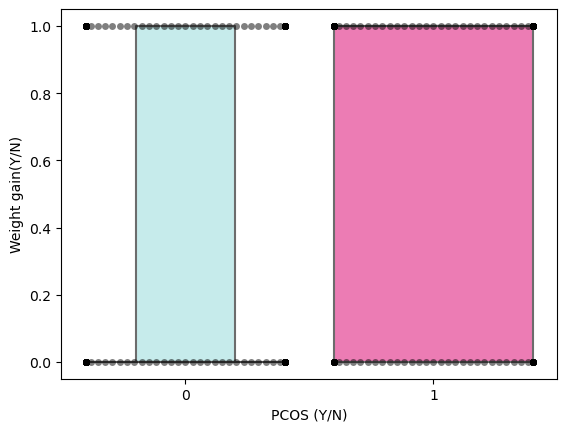

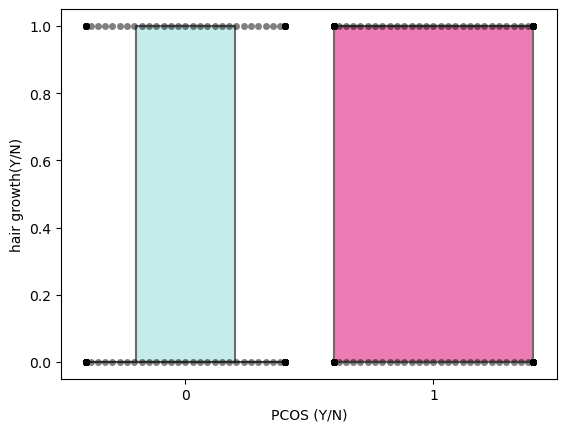

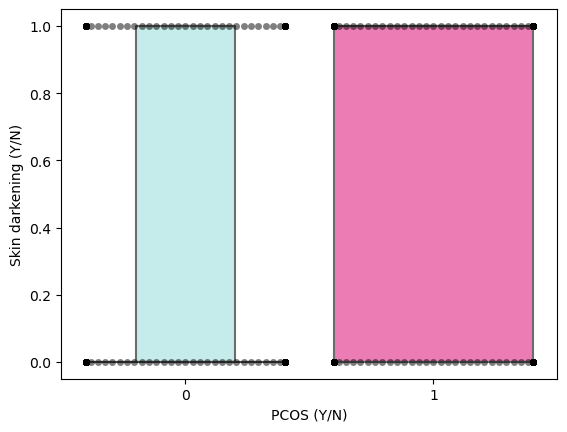

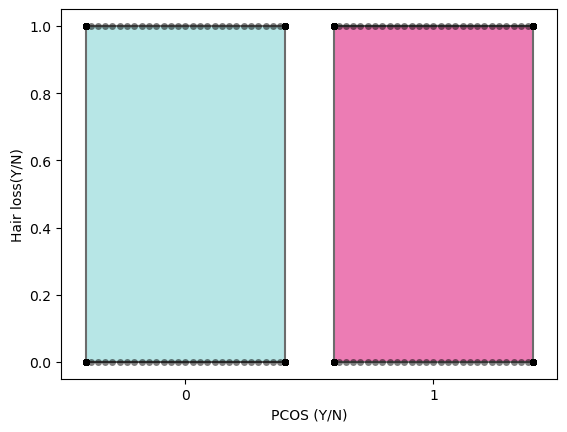

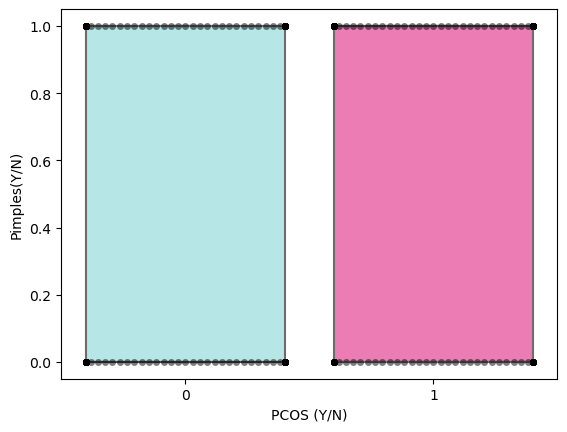

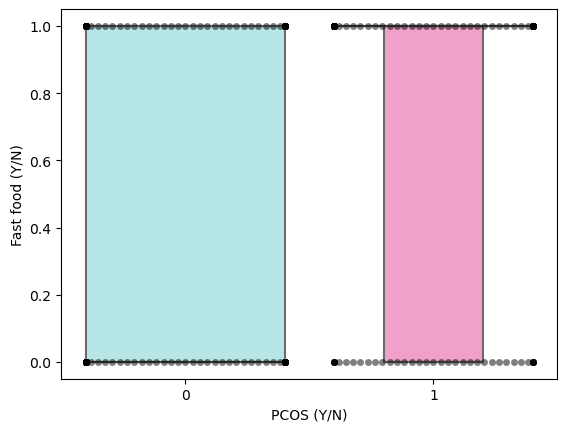

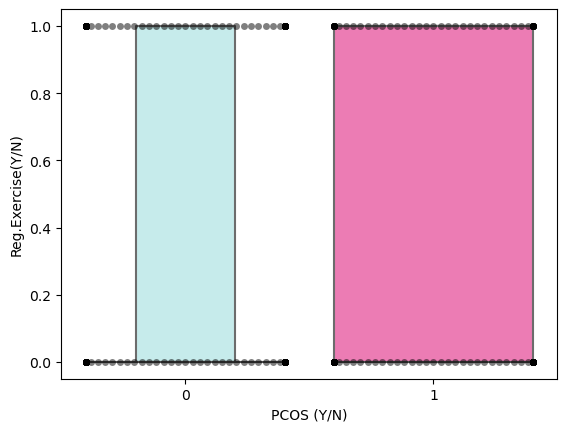

In [9]:
attributes2A1=['Weight gain(Y/N)', 'hair growth(Y/N)','Skin darkening (Y/N)',\
              'Hair loss(Y/N)', 'Pimples(Y/N)','Fast food (Y/N)', 'Reg.Exercise(Y/N)']
colours= ['PaleTurquoise','HotPink']
for i in attributes2A1:
    sns.swarmplot(x=pcos["PCOS (Y/N)"], y=pcos[i], color="black", alpha=0.5 )
    sns.boxenplot(x=pcos["PCOS (Y/N)"], y=pcos[i], palette=colours)
    plt.show()

## PREDICTION OF PCOS USING PHYSICAL SYMPTOMS

In [132]:
Models =["Random Forest", "Decision Tree", "SVC", "Logistic Regression"]
Score1 =[]

### - Using Random Forest Classifier

In [133]:
from sklearn.ensemble import RandomForestClassifier
model1= RandomForestClassifier(max_depth=40)
attributes3=['Weight gain(Y/N)', 'hair growth(Y/N)',\
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',\
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)']

x_train1,x_test1,y_train1,y_test1 =train_test_split(pcos[attributes3],pcos['PCOS (Y/N)'], test_size=0.2, random_state=0)


In [134]:
model1.fit(x_train1,y_train1)

RandomForestClassifier(max_depth=40)

In [135]:
model1.score(x_test1,y_test1)

0.7798165137614679

In [136]:
Score1.append(model1.score(x_test1,y_test1))

### - Using Decision Tree

In [137]:
from sklearn import tree
model1A = tree.DecisionTreeClassifier()
model1A.fit(x_train1,y_train1)

DecisionTreeClassifier()

In [138]:
model1A.score(x_test1,y_test1)

0.7614678899082569

In [139]:
Score1.append(model1A.score(x_test1,y_test1))

### - Using SVC

In [140]:
from sklearn.svm import SVC
model1B= SVC()
model1B.fit(x_train1,y_train1)

SVC()

In [141]:
model1B.score(x_test1,y_test1)

0.7798165137614679

In [142]:
Score1.append(model1B.score(x_test1,y_test1))

### - Using Logistic Regression

In [143]:
from sklearn.linear_model import LogisticRegression
model1C = LogisticRegression()
model1C.fit(x_train1,y_train1)

LogisticRegression()

In [144]:
model1C.score(x_test1,y_test1)

0.8073394495412844

In [145]:
Score1.append(model1C.score(x_test1,y_test1))

Text(0.5, 1.0, 'How Physical Symptoms affect PCOS\n\n')

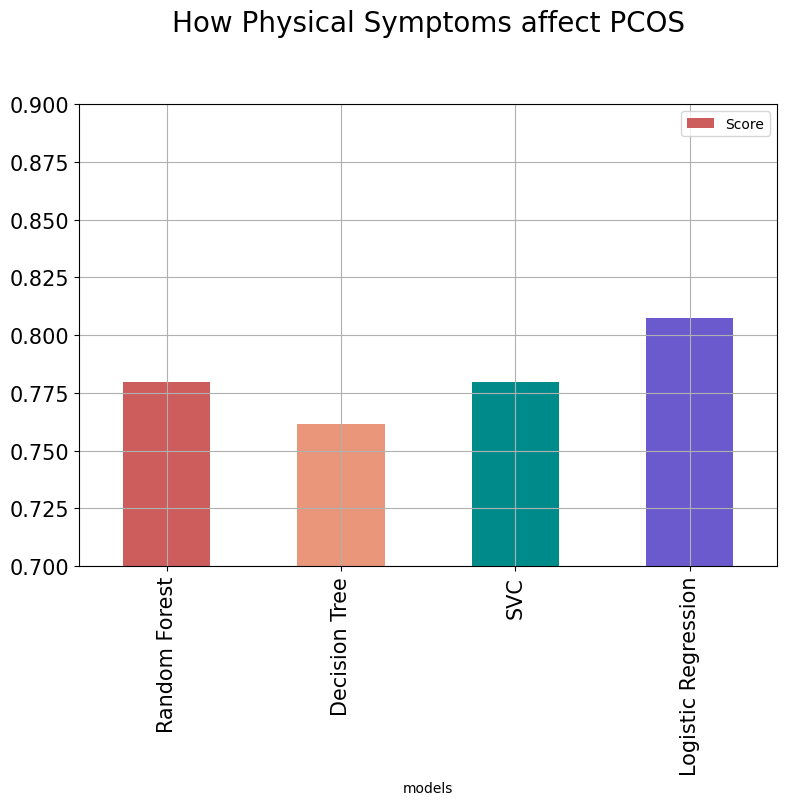

In [146]:
d1 = pd.DataFrame()
d1["models"]= Models
d1["Score"]=Score1
colour=["Indianred","darksalmon","darkcyan","Slateblue"]
d1.plot(kind="bar", x="models", y="Score", grid=True, figsize=(9,6), fontsize=15, color=colour)
plt.ylim(0.7,0.9)
plt.title('How Physical Symptoms affect PCOS\n\n', fontsize=20)

# How hormones affect pcos

GRAPH

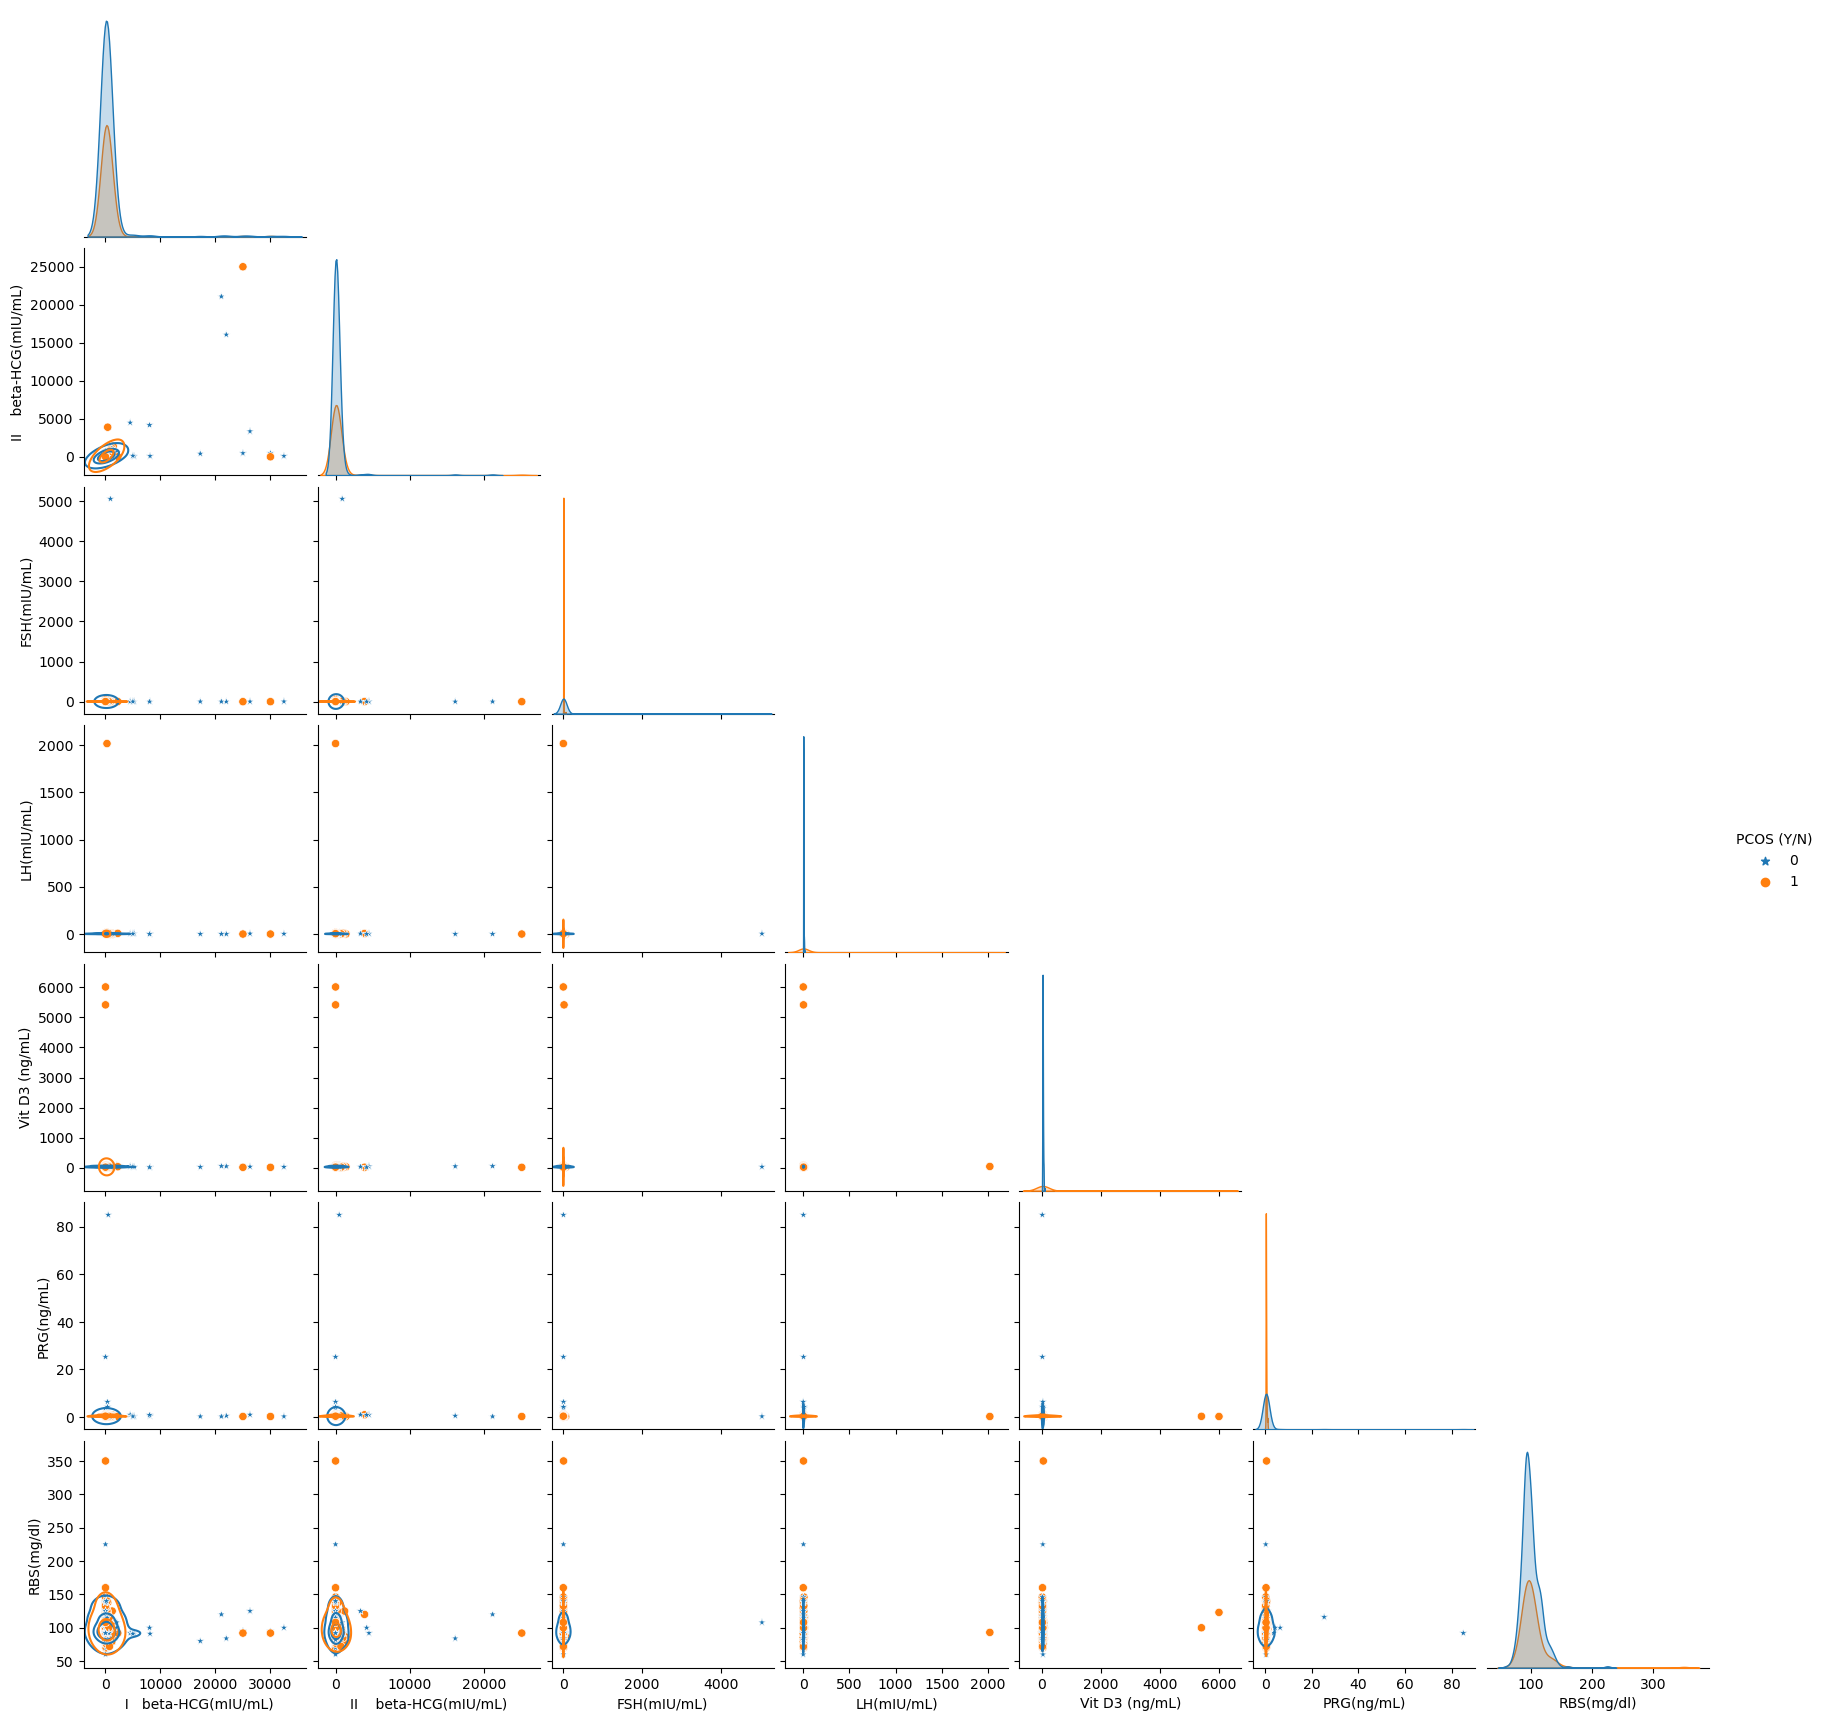

In [33]:
attributes=['PCOS (Y/N)','  I   beta-HCG(mIU/mL)',\
       'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)','Vit D3 (ng/mL)', 'PRG(ng/mL)','RBS(mg/dl)']
hormone = pcos[attributes]
m= sns.pairplot(data=hormone, hue="PCOS (Y/N)", corner=True, diag_kind="kde", markers=["*","o"])
m.map_lower(sns.kdeplot, levels=4, color=".2")

## Individual Hormones Effects on PCOS 

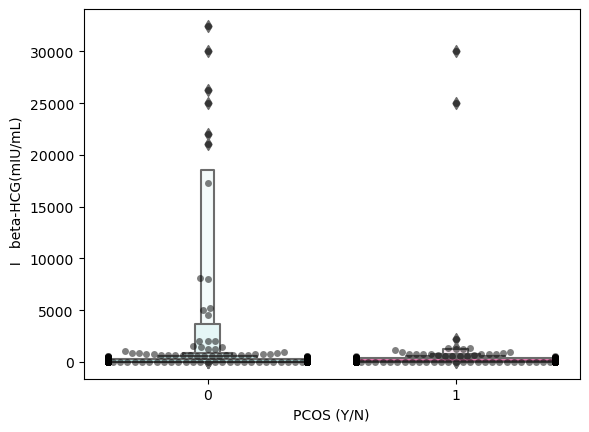

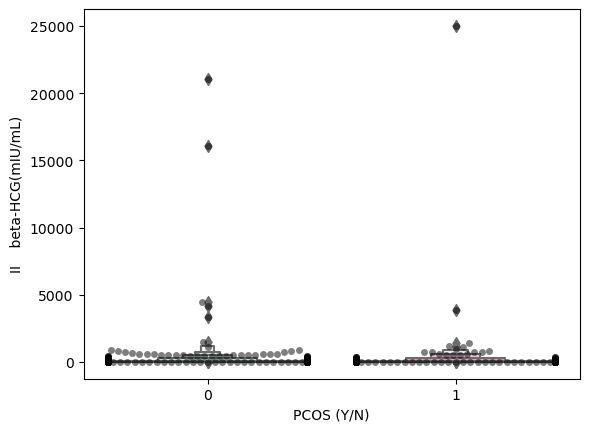

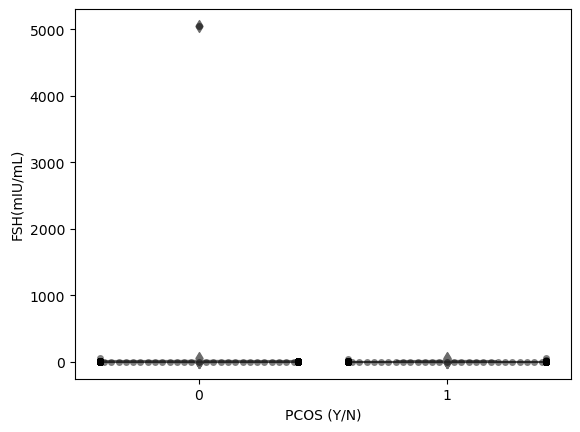

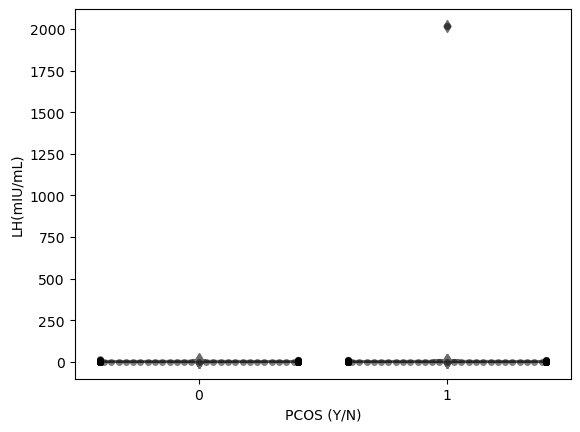

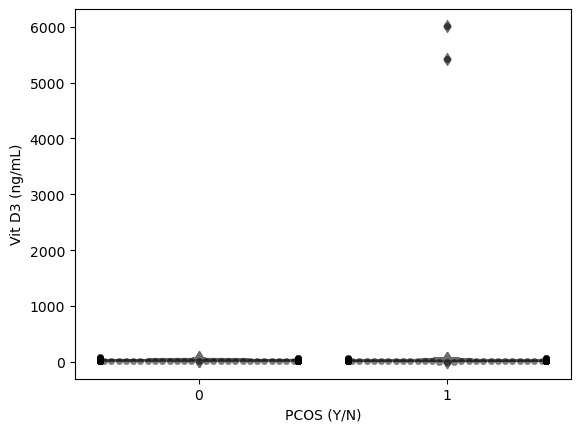

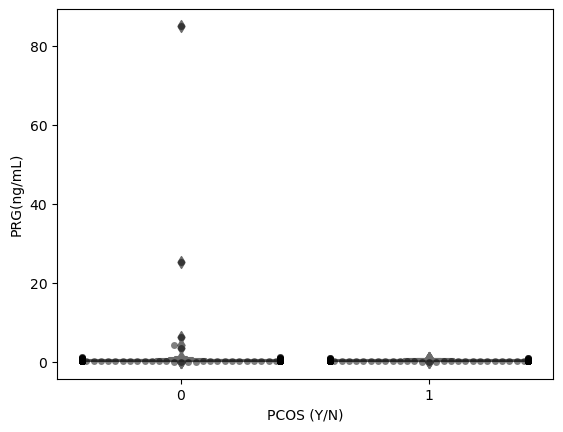

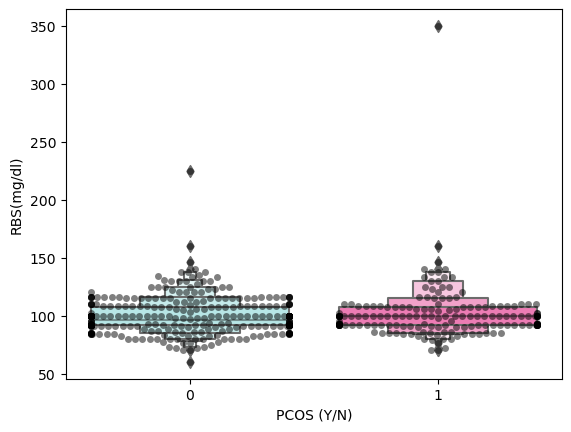

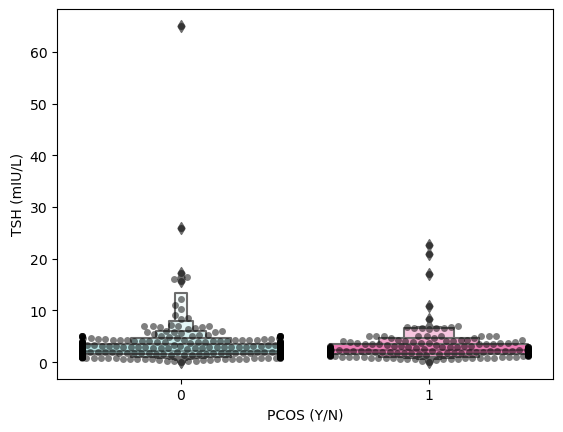

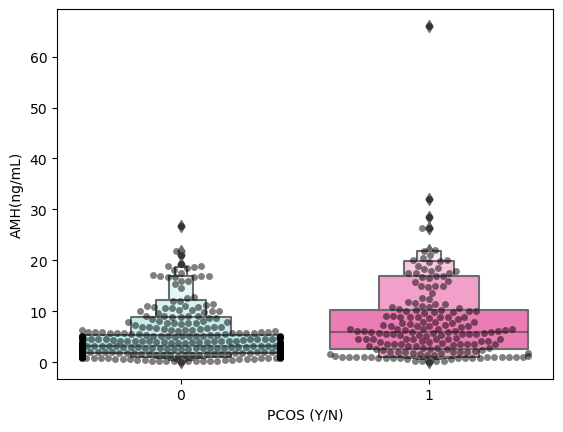

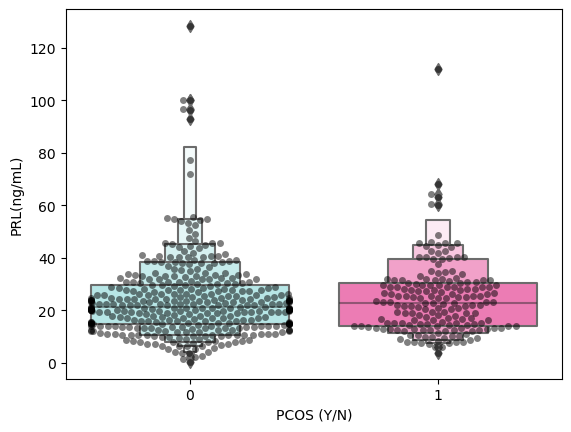

In [34]:
attributes1=['  I   beta-HCG(mIU/mL)',\
       'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)','Vit D3 (ng/mL)', 'PRG(ng/mL)','RBS(mg/dl)','TSH (mIU/L)',\
       'AMH(ng/mL)', 'PRL(ng/mL)']
for i in attributes1:
    sns.swarmplot(x=pcos["PCOS (Y/N)"], y=pcos[i], color="black", alpha=0.5 )
    sns.boxenplot(x=pcos["PCOS (Y/N)"], y=pcos[i], palette=colours)
    plt.show()

PREDICTION OF PCOS USING THE HORMONES

In [35]:
Models =["Random Forest", "Decision Tree", "SVC", "Logistic Regression"]
Score =[]

## - Using Random Forest Classfier

In [36]:

attributes4=['  I   beta-HCG(mIU/mL)',\
       'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)','Vit D3 (ng/mL)', 'PRG(ng/mL)','RBS(mg/dl)','TSH (mIU/L)',\
       'AMH(ng/mL)', 'PRL(ng/mL)']
model2=RandomForestClassifier(max_depth=40)
x_train2,x_test2,y_train2,y_test2 =train_test_split(pcos[attributes4],pcos['PCOS (Y/N)'], test_size=0.2, random_state=0)
model2.fit(x_train2,y_train2)

RandomForestClassifier(max_depth=40)

In [37]:
model2.score(x_test2,y_test2)

0.6605504587155964

In [38]:
Score.append(model2.score(x_test2,y_test2))

## - Using Decision Tree

In [39]:
model2A = tree.DecisionTreeClassifier()
model2A.fit(x_train2,y_train2)
model2A.score(x_test2, y_test2)

0.6055045871559633

In [40]:
Score.append(model2A.score(x_test2,y_test2))

## - Using SVC

In [41]:
model2B = SVC()
model2B.fit(x_train2,y_train2)
model2B.score(x_test2, y_test2)

0.6422018348623854

In [42]:
Score.append(model2B.score(x_test2,y_test2))

## - Using Logistic Regression

In [43]:
model2C = LogisticRegression()
model2C.fit(x_train2,y_train2)
model2C.score(x_test2, y_test2)

0.6330275229357798

In [44]:
Score.append(model2C.score(x_test2, y_test2))

Text(0.5, 1.0, 'How Hormone affect PCOS\n\n')

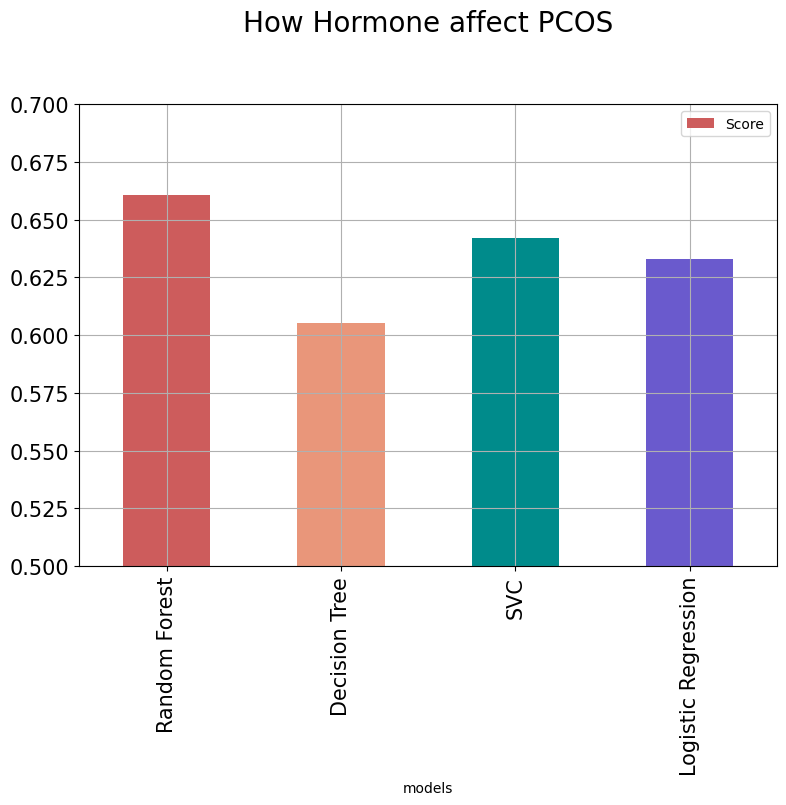

In [45]:
d2 = pd.DataFrame()
d2["models"]= Models
d2["Score"]=Score
colour=["Indianred","darksalmon","darkcyan","Slateblue"]
d2.plot(kind="bar", x="models", y="Score", grid=True, figsize=(9,6), fontsize=15, color=colour)
plt.ylim(0.5,0.7)
plt.title('How Hormone affect PCOS\n\n', fontsize=20)

# How Blood and Breathing parameters helps in predicting PCOS

GRAPH

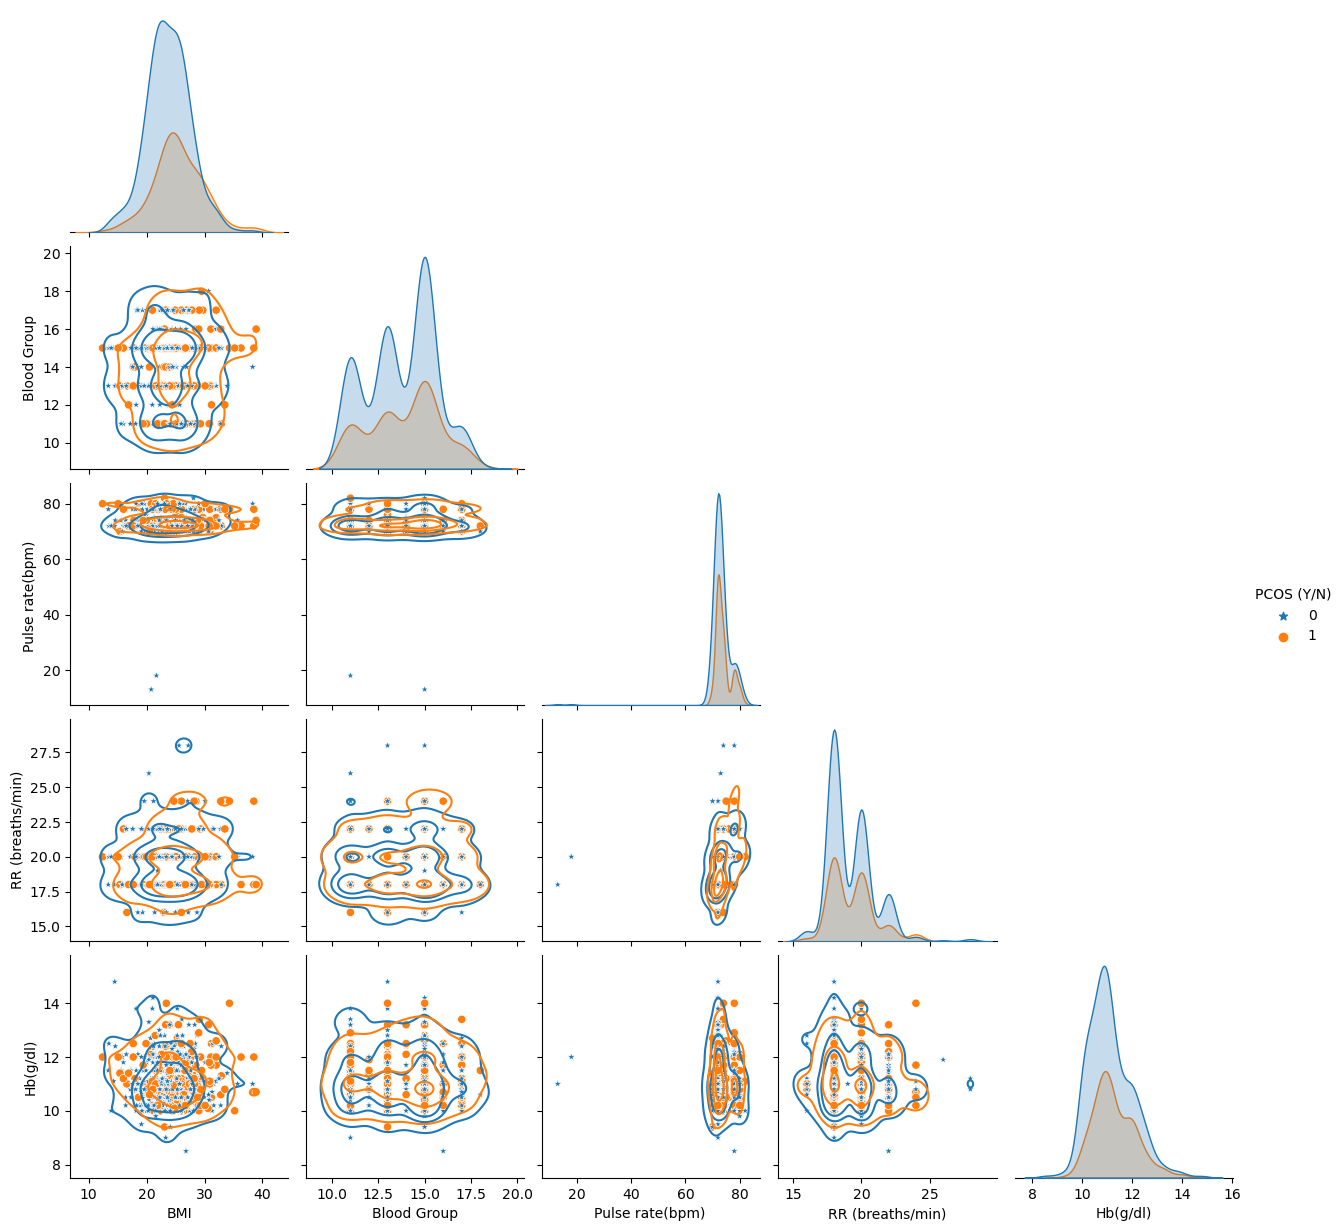

In [94]:
attributes2=['PCOS (Y/N)','BMI','Blood Group','Pulse rate(bpm) ','RR (breaths/min)','Hb(g/dl)']
n= sns.pairplot(pcos[attributes2], hue='PCOS (Y/N)', corner=True, diag_kind="kde", markers=["*","o"])
n.map_lower(sns.kdeplot, levels=4, color=".2")

<Axes: >

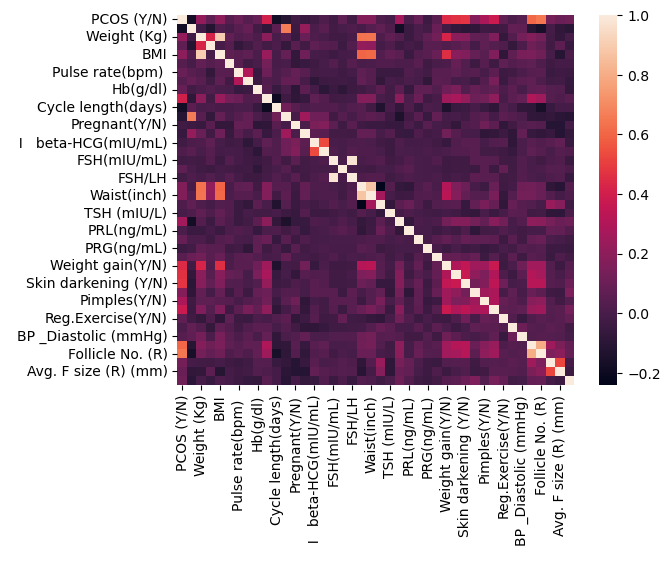

In [95]:
sns.heatmap(pcos.corr())

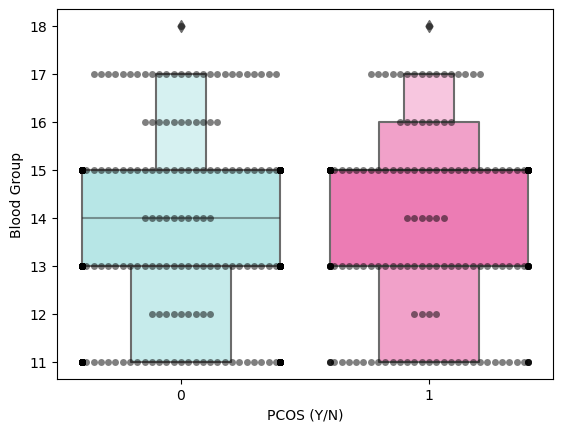

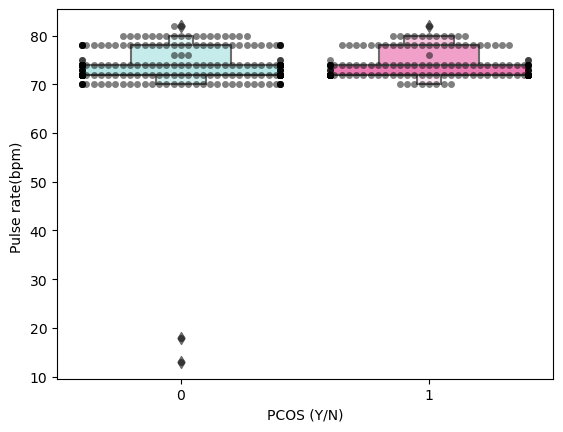

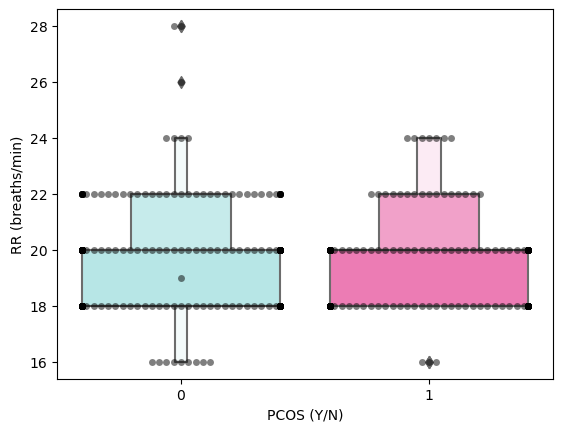

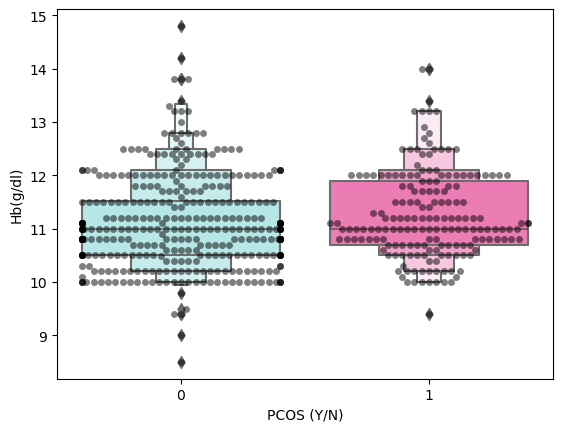

In [96]:
attributes5=['Blood Group', 'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)']
for i in attributes5:
    sns.swarmplot(x=pcos["PCOS (Y/N)"], y=pcos[i], color="black", alpha=0.5 )
    sns.boxenplot(x=pcos["PCOS (Y/N)"], y=pcos[i], palette=colours)
    plt.show()

## PREDICTING PCOS USING BLOOD AND BREATHING REPORTS

In [110]:
Models =["Random Forest", "Decision Tree", "SVC", "Logistic Regression"]
Score2 =[]

### - Random Forest Classifier

In [111]:
model3=RandomForestClassifier(max_depth=40)
x_train3,x_test3,y_train3,y_test3 =train_test_split(pcos[attributes5],pcos['PCOS (Y/N)'], test_size=0.2)
model3.fit(x_train3,y_train3)

RandomForestClassifier(max_depth=40)

In [112]:
model3.score(x_test3,y_test3)

0.6146788990825688

In [113]:
Score2.append(model3.score(x_test3,y_test3))

### - Using Decision Tree 

In [114]:
model3A = tree.DecisionTreeClassifier()
model3A.fit(x_train3,y_train3)
model3A.score(x_test3, y_test3)

0.5963302752293578

In [115]:
Score2.append(model3.score(x_test3,y_test3))

### - Using SVC

In [116]:
model3B = SVC()
model3B.fit(x_train3,y_train3)
model3B.score(x_test3, y_test3)

0.6513761467889908

In [117]:
Score2.append(model3B.score(x_test3, y_test3))

### - Using Logistic Regression

In [118]:
model2C = LogisticRegression()
model2C.fit(x_train3,y_train3)
model2C.score(x_test3, y_test3)

0.6513761467889908

In [119]:
Score2.append(model2C.score(x_test3, y_test3))

Text(0.5, 1.0, 'How Breathing and Blood Parameters affect PCOS\n\n')

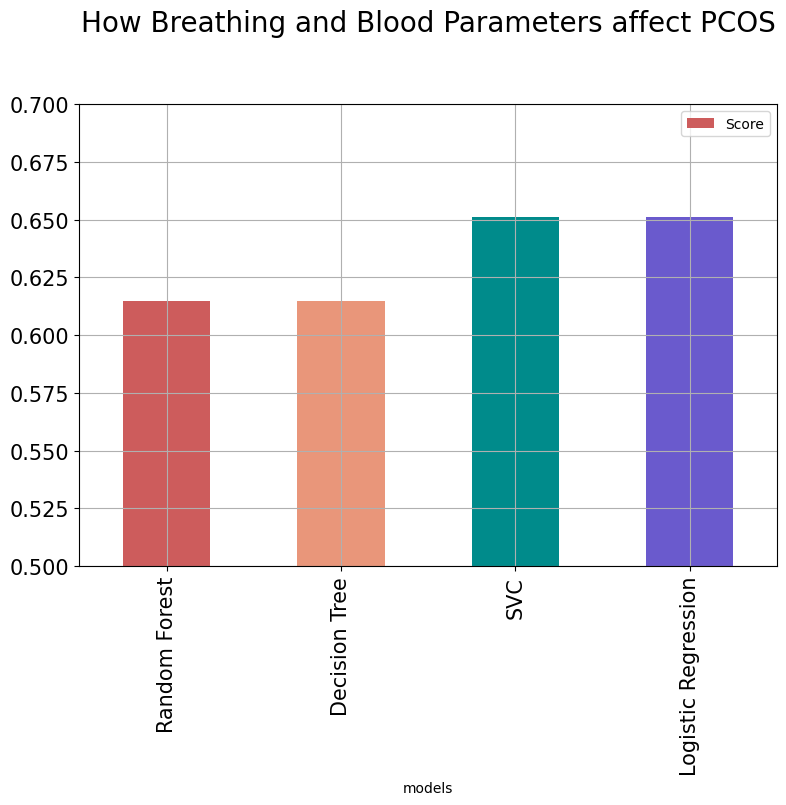

In [120]:
d3 = pd.DataFrame()
d3["models"]= Models
d3["Score"]=Score2
colour=["Indianred","darksalmon","darkcyan","Slateblue"]
d3.plot(kind="bar", x="models", y="Score", grid=True, figsize=(9,6), fontsize=15, color=colour)
plt.ylim(0.5,0.7)
plt.title('How Breathing and Blood Parameters affect PCOS\n\n', fontsize=20)

# Personal Features Affecting PCOS

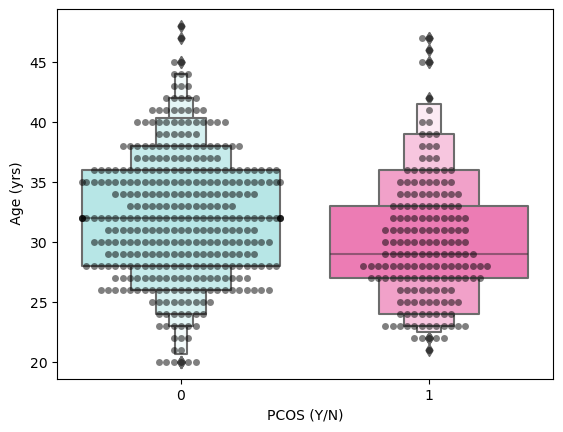

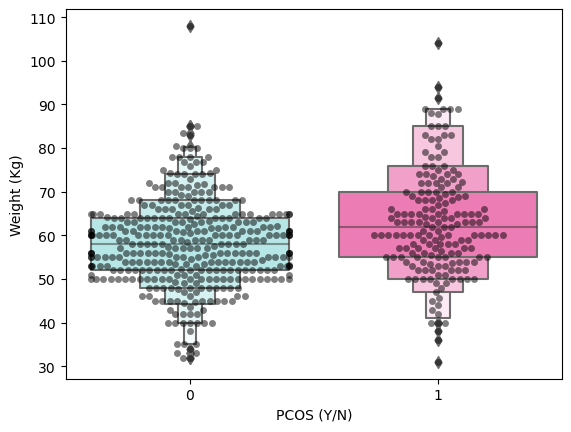

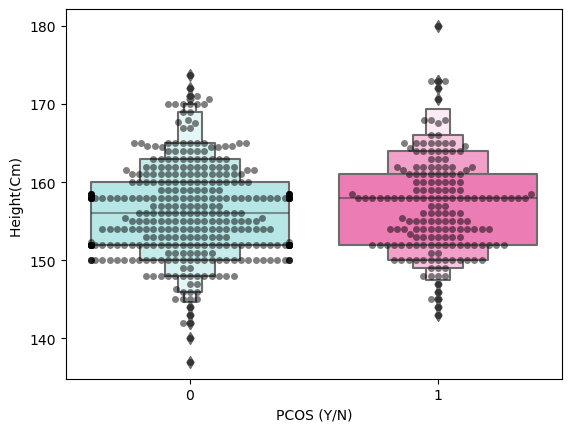

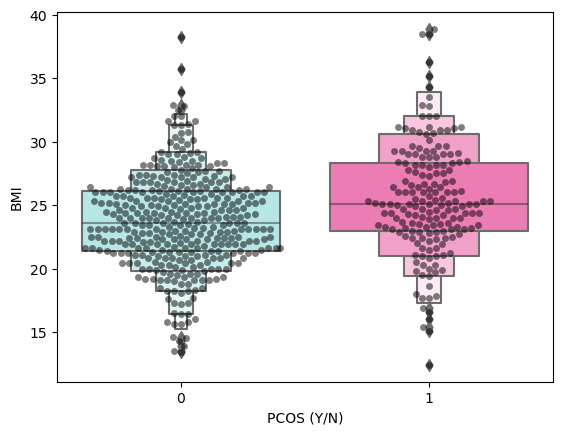

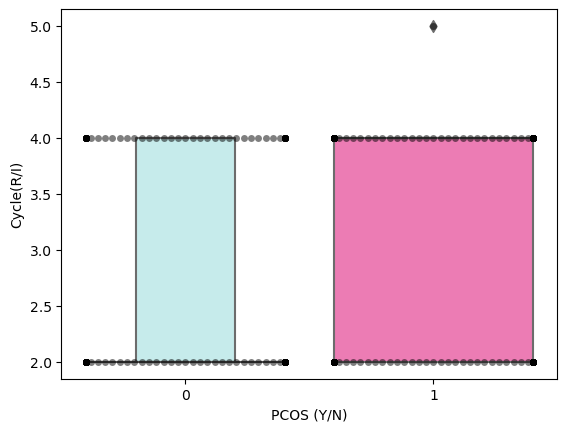

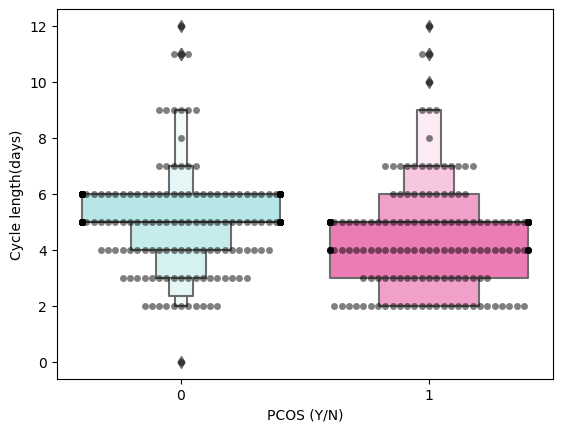

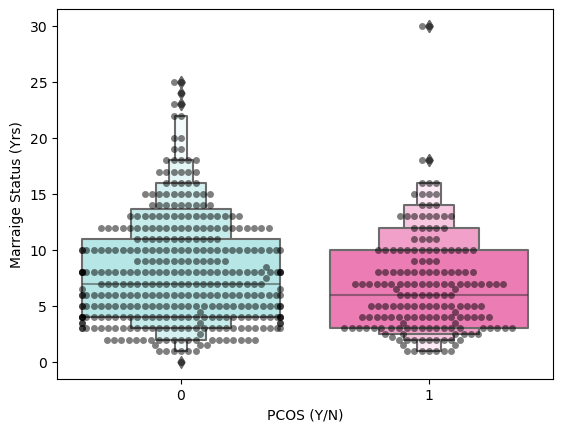

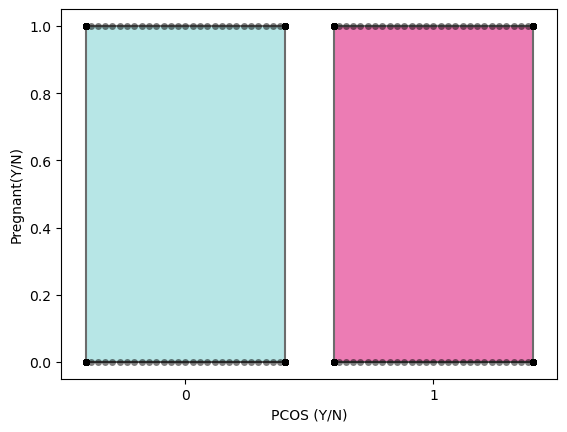

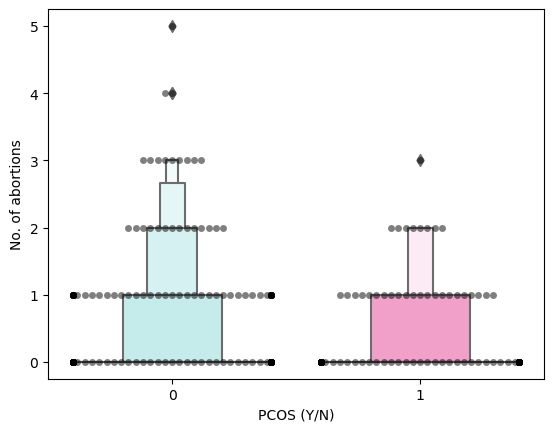

In [60]:
attributes6 = [' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI','Cycle(R/I)', 'Cycle length(days)',\
               'Marraige Status (Yrs)',\
       'Pregnant(Y/N)', 'No. of abortions']
for i in attributes6:
    sns.swarmplot(x=pcos["PCOS (Y/N)"], y=pcos[i], color="black", alpha=0.5 )
    sns.boxenplot(x=pcos["PCOS (Y/N)"], y=pcos[i], palette=colours)
    plt.show()

# Internal Organs Functioning Affecting PCOS

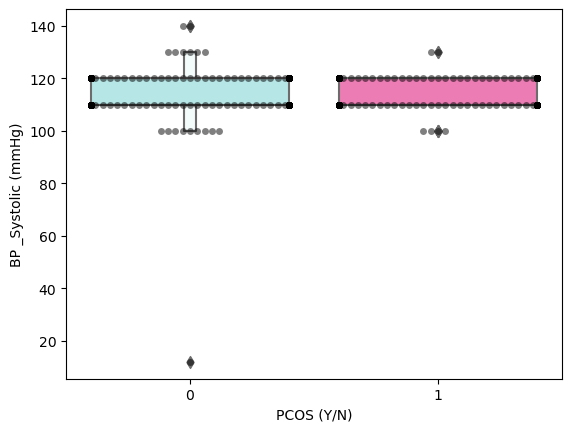

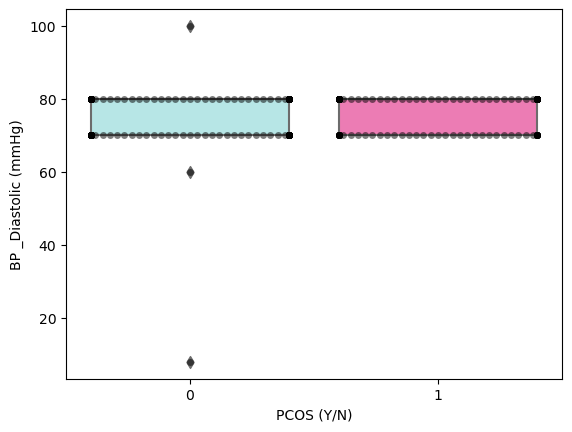

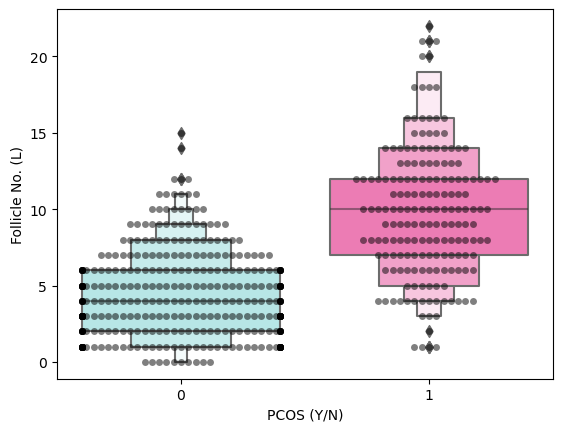

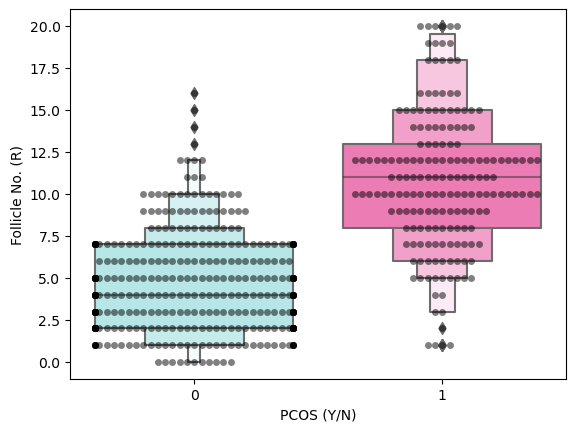

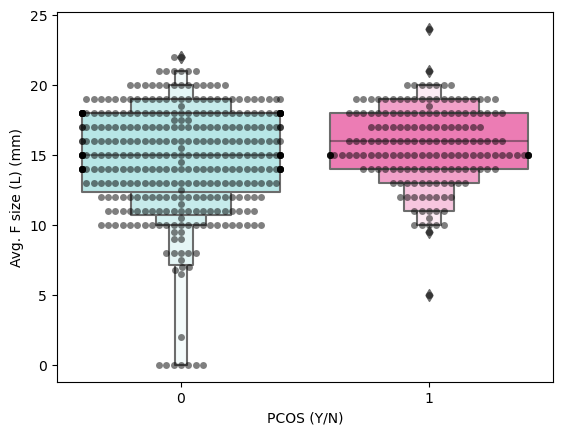

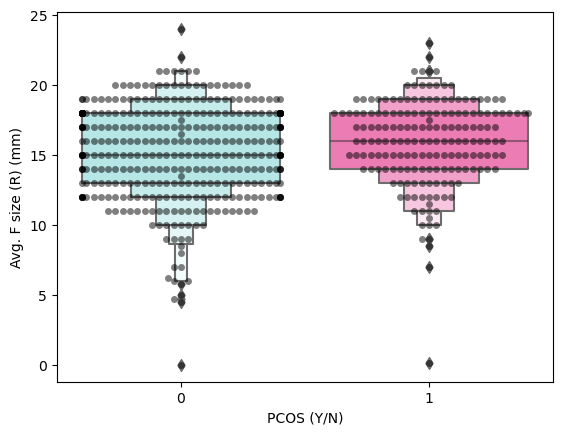

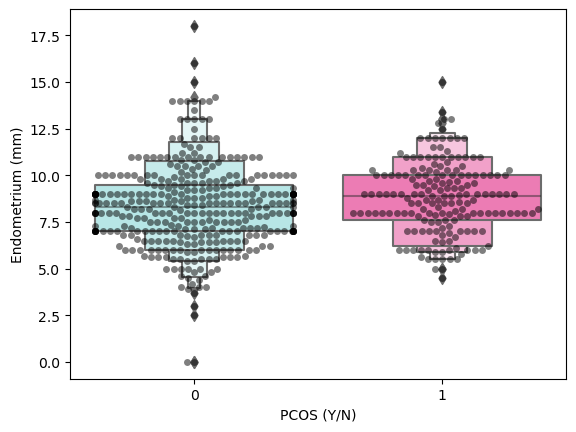

In [61]:
attributes7 = ['BP _Systolic (mmHg)',\
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',\
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)']
for i in attributes7:
    sns.swarmplot(x=pcos["PCOS (Y/N)"], y=pcos[i], color="black", alpha=0.5 )
    sns.boxenplot(x=pcos["PCOS (Y/N)"], y=pcos[i], palette=colours)
    plt.show()

In [121]:
Models =["Random Forest", "Decision Tree", "SVC", "Logistic Regression"]
Score4 =[]

In [122]:
model4=RandomForestClassifier(max_depth=40)
x_train4,x_test4,y_train4,y_test4 =train_test_split(pcos[attributes4],pcos['PCOS (Y/N)'], test_size=0.2, random_state=0)
model4.fit(x_train4,y_train4)

RandomForestClassifier(max_depth=40)

In [123]:
model4.score(x_test4,y_test4)

0.6513761467889908

In [124]:
Score4.append(model4.score(x_test4,y_test4))

In [125]:
model4A = tree.DecisionTreeClassifier()
model4A.fit(x_train4,y_train4)
model4A.score(x_test4, y_test4)

0.6146788990825688

In [126]:
Score4.append(model4A.score(x_test4,y_test4))

In [127]:
model4B = SVC()
model4B.fit(x_train4,y_train4)
model4B.score(x_test4, y_test4)

0.6422018348623854

In [128]:
Score4.append(model4B.score(x_test4, y_test4))

In [129]:
model4C = LogisticRegression()
model4C.fit(x_train4,y_train4)
model4C.score(x_test4, y_test4)

0.6330275229357798

In [130]:
Score4.append(model4C.score(x_test4, y_test4))

Text(0.5, 1.0, 'Internal Organs Functioning Affecting PCOS\n\n')

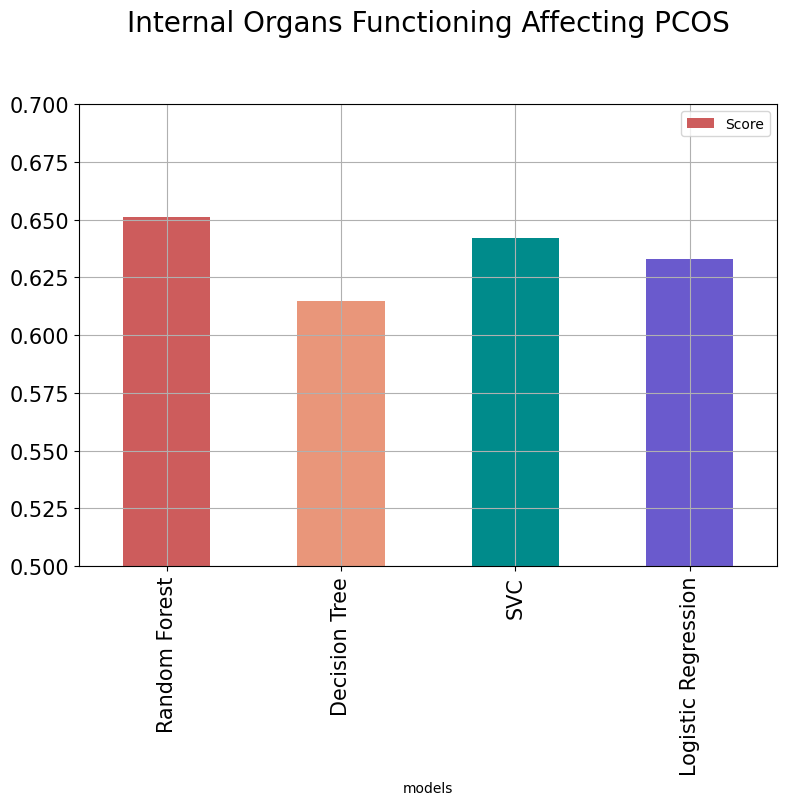

In [131]:
d4 = pd.DataFrame()
d4["models"]= Models
d4["Score"]=Score4
colour=["Indianred","darksalmon","darkcyan","Slateblue"]
d4.plot(kind="bar", x="models", y="Score", grid=True, figsize=(9,6), fontsize=15, color=colour)
plt.ylim(0.5,0.7)
plt.title('Internal Organs Functioning Affecting PCOS\n\n', fontsize=20)

# Modeling Data

## Used all the given inputs to predict PCOS
### Using Random Forest Classifier

In [73]:
Models =["Random Forest", "Decision Tree", "SVC", "Logistic Regression", "Random Forest(Chi Square)"]
Scores =[]

In [74]:
x_train,x_test,y_train,y_test =train_test_split(pcos.drop("PCOS (Y/N)",axis="columns"),pcos['PCOS (Y/N)'], test_size=0.2, random_state=0)

In [75]:
from sklearn.ensemble import RandomForestClassifier
All_factors = RandomForestClassifier(max_depth=40)
All_factors.fit(x_train,y_train)

RandomForestClassifier(max_depth=40)

In [76]:
All_factors.score(x_test,y_test)

0.8990825688073395

In [77]:
All_factors.predict(x_test)

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [78]:
y_test

71     0
392    1
378    0
365    0
140    0
      ..
299    0
229    0
537    0
496    0
10     0
Name: PCOS (Y/N), Length: 109, dtype: int64

In [79]:
Scores.append(All_factors.score(x_test,y_test))

# RANDOM FOREST CONFUSION MATRIX

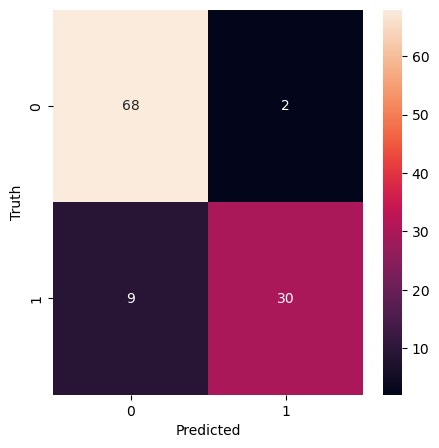

In [149]:
y_pred=All_factors.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [153]:
    y_pred=All_factors.predict(x_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')

True Positives: 30
True Negatives: 68
False Positives: 2
False Negatives: 9
--------------------------------------------------
Accuracy: 0.9
Mis-Classification: 0.1
Sensitivity: 0.77
Specificity: 0.97
Precision: 0.97
f_1 Score: 0.86


In [169]:
from sklearn import tree
All_Factors2 = tree.DecisionTreeClassifier()
All_Factors2.fit(x_train,y_train)
All_Factors2.score(x_test,y_test)

0.8073394495412844

In [170]:
Scores.append(All_Factors2.score(x_test,y_test))

In [166]:
### DECISION TREES CONFUSION MATRIX

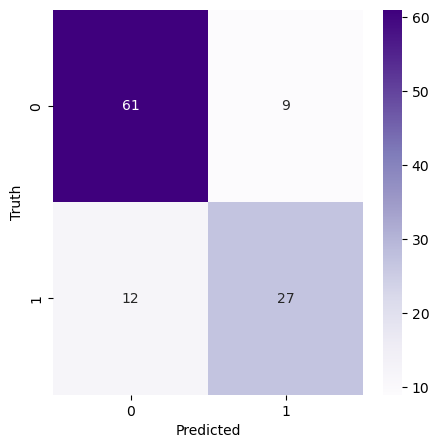

In [175]:
y_pred=All_Factors2.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, cmap="Purples")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [176]:
    y_pred=All_Factors2.predict(x_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')

True Positives: 27
True Negatives: 61
False Positives: 9
False Negatives: 12
--------------------------------------------------
Accuracy: 0.81
Mis-Classification: 0.19
Sensitivity: 0.69
Specificity: 0.87
Precision: 0.87
f_1 Score: 0.77


In [177]:
from sklearn.svm import SVC
All_Factors3= SVC()
All_Factors3.fit(x_train,y_train)
All_Factors3.score(x_test,y_test)

0.6422018348623854

In [178]:
Scores.append(All_Factors3.score(x_test,y_test))

SVC CONFUSION MATRIX

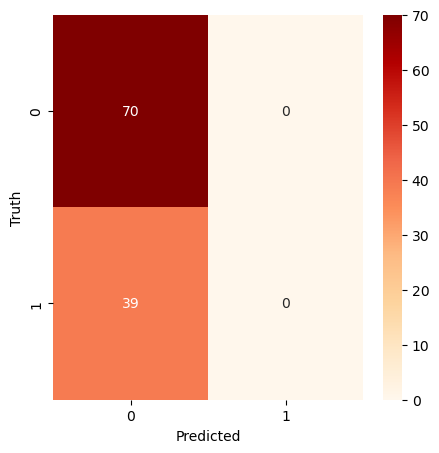

In [179]:
y_pred=All_Factors3.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, cmap="OrRd")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [181]:
    y_pred=All_Factors3.predict(x_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')

True Positives: 0
True Negatives: 70
False Positives: 0
False Negatives: 39
--------------------------------------------------
Accuracy: 0.64
Mis-Classification: 0.36
Sensitivity: 0.0
Specificity: 1.0
Precision: 1.0
f_1 Score: 0.0


In [182]:
from sklearn.linear_model import LogisticRegression
All_Factors4 = LogisticRegression()
All_Factors4.fit(x_train,y_train)
All_Factors4.score(x_test,y_test)

0.8165137614678899

In [183]:
Scores.append(All_Factors4.score(x_test,y_test))

In [184]:
### LOGISTIC REGRESSION CONFUSION MATRIX

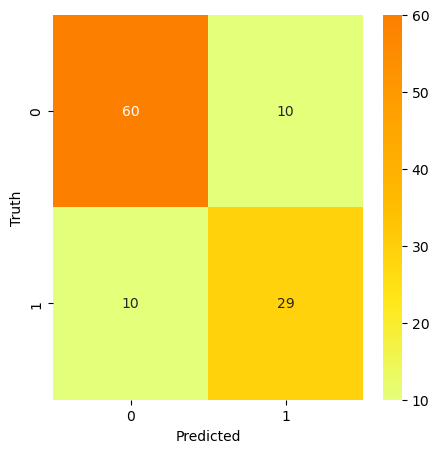

In [185]:
y_pred=All_Factors4.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, cmap="Wistia")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [186]:
    y_pred=All_Factors4.predict(x_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')

True Positives: 29
True Negatives: 60
False Positives: 10
False Negatives: 10
--------------------------------------------------
Accuracy: 0.82
Mis-Classification: 0.18
Sensitivity: 0.74
Specificity: 0.86
Precision: 0.86
f_1 Score: 0.8
